
# DRE dissipation vs requirement

## Laurent @IRAP

----

* Created 17/03/2021
* Updated 09/06/2021 with new DRE power estimate

This Notebook illustrates the DRE thermal dissipation with respect to its requirement.

----


In [1]:
import numpy as np
import matplotlib.pyplot as plt

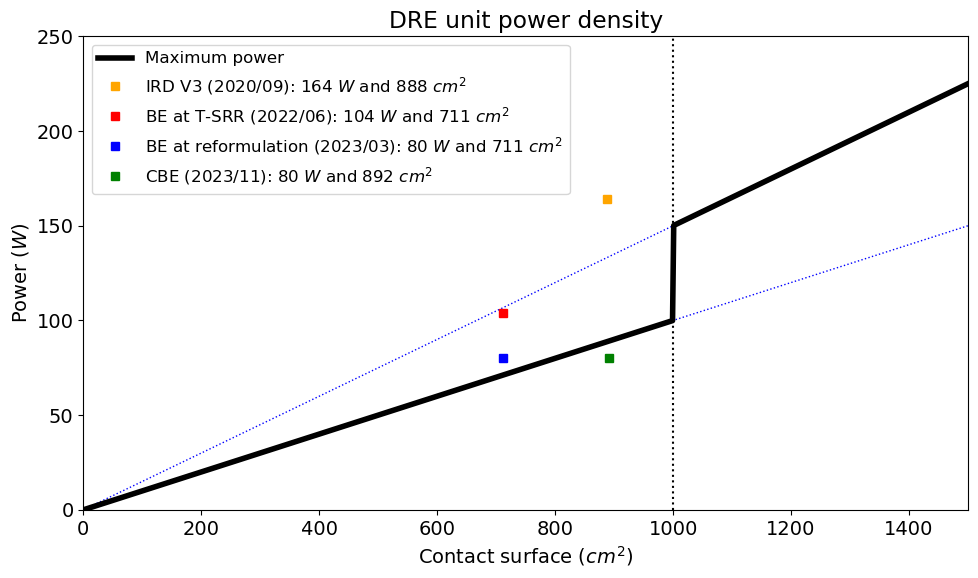

In [2]:
plt.rcParams.update({'font.size':14})
Npts=1000
surface=np.linspace(0, 2000, Npts)
flux_max_below_1000cm2=0.1 # W per cm^2
flux_max_over_1000cm2=0.15 # W per cm^2
S_lim=1000 # Surface at which the heat flux requirement changes (in cm2)

power_max=np.zeros(Npts)
index1=np.nonzero(surface < S_lim)[0]
power_max[index1]=surface[index1]*flux_max_below_1000cm2
index2=np.nonzero(surface >= S_lim)[0]
power_max[index2]=surface[index2]*flux_max_over_1000cm2
# Conf 2020/09 (IRD v3 ?)
IRDv3=True
DRE_surface_1=888
DRE_dissip_1=164
# Conf ???
unknown1=False
DRE_surface_2=888
DRE_dissip_2=127
# Conf 2022 (I-SRR)
TSRR=True
DRE_surface_4=int(22.8*31.2)
DRE_dissip_4=104
# Conf 2023 (new Athena)
reformulation=True
DRE_surface_5=DRE_surface_4
DRE_dissip_5=80
# Conf 2023/11 (Increase area CV)
conf202311=True
DRE_dissip_6=DRE_dissip_5
DRE_surface_6=892


fig=plt.figure(figsize=(10,6))

ax=fig.add_subplot(1,1,1)
ax.plot(surface, surface*flux_max_below_1000cm2, ':', linewidth=1, color='b')
ax.plot(surface, surface*flux_max_over_1000cm2, ':', linewidth=1, color='b')
ax.plot(surface, power_max, linewidth=4, color='k', label='Maximum power')
ax.plot([S_lim, S_lim], [0, 300], ':k')
if IRDv3:
    ax.plot(DRE_surface_1, DRE_dissip_1, 's', color='orange', label='IRD V3 (2020/09): {0:1d} $W$ and {1:1d} $cm^2$'.format(DRE_dissip_1, DRE_surface_1))
if unknown1:
    ax.plot(DRE_surface_2, DRE_dissip_2, 's', color='pink', label='New power estimate ({0:1d} $W$ and {1:1d} $cm^2$)'.format(DRE_dissip_2, DRE_surface_2))
if TSRR:
    ax.plot(DRE_surface_4, DRE_dissip_4, 's', color='r', label='BE at T-SRR (2022/06): {0:1d} $W$ and {1:1d} $cm^2$'.format(DRE_dissip_4, DRE_surface_4))
if reformulation:
    ax.plot(DRE_surface_5, DRE_dissip_5, 's', color='b', label='BE at reformulation (2023/03): {0:1d} $W$ and {1:1d} $cm^2$'.format(DRE_dissip_5, DRE_surface_5))
if conf202311:
    ax.plot(DRE_surface_6, DRE_dissip_6, 's', color='g', label='CBE (2023/11): {0:1d} $W$ and {1:1d} $cm^2$'.format(DRE_dissip_6, DRE_surface_6))

ax.set_title('DRE unit power density')
ax.set_xlabel('Contact surface ($cm^2$)')
ax.set_ylabel('Power ($W$)')
ax.set_xlim(0,1500)
ax.set_ylim(0,250)
ax.legend(loc='best', prop={'size': 12})
fig.tight_layout()
plt.savefig('DRE-power-dissipation.jpg', dpi=200, bbox_inches='tight')

